In [9]:
import random as rn
import numpy as np
import matplotlib.pyplot as plt

In [10]:
N = 100
a1_real = 0
a2_real = 3
d = 1
X = np.zeros(N)

for i in range(N):
    prob = rn.uniform(0,1)
    if prob <= 1/3:
        X[i] = rn.normalvariate(a1_real,d)
    else:
        X[i] = rn.normalvariate(a2_real,d)

print(X)


[ 3.56115863  3.45932687  1.31480811  2.68436051  3.00050527 -0.07861253
  2.45019057  2.6489549   3.13586074  2.6932189   3.87473287  2.00283302
 -0.50990997  1.19285078  1.35562024 -0.63871181  4.38054971  2.45205153
  0.67293469  3.23752325  1.20726248  4.05954572 -2.26936865  3.77996457
  2.74563793  2.81472228 -1.06001459  0.14724259  1.21946175  4.3935691
 -1.75223618  2.28808828  3.16410181  1.17259924  4.08555019  3.49741055
  3.10622965  0.69947765  1.7266882   3.36522472  3.92290672  3.99548275
 -0.044391    0.84108351 -0.4024847   3.87848974  2.86834501 -1.36834957
  3.02353839 -1.21417983  1.93725606  0.95706735  2.46670215  0.86099456
 -0.83859234  2.18728163 -0.2382642   3.5006867   2.5483586   0.29819392
  2.16698707  1.20791664  1.74738026  3.07289192  0.07818558  3.15004246
 -1.8850428   3.23594805  3.81652396 -0.24826186  3.39579362  0.45228468
  0.72975405  3.39447807  1.72221411 -0.5007545   3.75663423  3.5842717
  3.49408092  2.96486775  1.81682651 -0.69117944  2.5

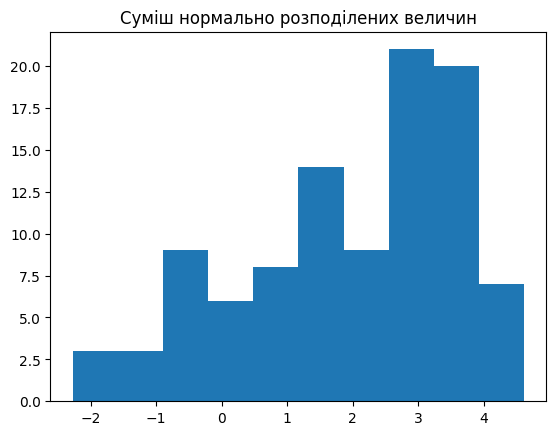

In [11]:
plt.hist([X[i] for i in range(N)])
plt.title("Суміш нормально розподілених величин")
plt.show()

![image](алгоритм.jpg)

In [17]:
def f(x,a):
    return 1/np.sqrt(2*np.pi)*np.exp(-(x-a)**2/2)

T = 10
p = np.zeros((T,2))
p[0] = [0.5,0.5]
a = np.zeros((T,2))
a[0] = [1,2]


for t in range(T-1):
    alpha = np.zeros((N,2))
    for i in range(N):
        denum = 0
        for k in range(2):  
            denum += p[t][k]*f(X[i],a[t][k])
        for k in range(2):
            alpha[i][k] = p[t][k]*f(X[i],a[t][k])/denum

    for k in range(2):
        for i in range(N):
            p[t+1][k] += alpha[i][k]/N
 
    for k in range(2):
        if k == 0:
            a_0 = [-1,0,1]
            whoargmax_0 = np.zeros(len(a_0))
            for j in range(len(a_0)):
                for i in range(N):
                    whoargmax_0[j] += alpha[i][k]*np.log(f(X[i],a_0[j]))
            a[t+1][0] = a_0[np.argmax(whoargmax_0)]
        else: 
            a_1 = [1,2,3]
            whoargmax_1 = np.zeros(len(a_1))
            for j in range(len(a_1)):
                for i in range(N):
                    whoargmax_1[j] += alpha[i][k]*np.log(f(X[i],a_1[j]))
            a[t+1][1] = a_1[np.argmax(whoargmax_1)]

    print(f"Ітерація {t+1}: a = {a[t]}, p = {p[t]}")

    if abs(p[t+1][0] - p[t][0]) < 0.001 and abs(p[t+1][1] - p[t][1]) < 0.001 and a[t+1][0] == a[t][0] and a[t+1][1] == a[t][1]:
        break
    


    

Ітерація 1: a = [1. 2.], p = [0.5 0.5]
Ітерація 2: a = [1. 3.], p = [0.40572746 0.59427254]
Ітерація 3: a = [0. 3.], p = [0.4236308 0.5763692]
Ітерація 4: a = [0. 3.], p = [0.34686515 0.65313485]
Ітерація 5: a = [0. 3.], p = [0.3299366 0.6700634]
Ітерація 6: a = [0. 3.], p = [0.32603013 0.67396987]
